In [1]:
import pandas as pd 
import yfinance as yf 
from tqdm import tqdm
import ta 
import matplotlib.pyplot as plt

In [2]:
ticker = "AMD"
df = yf.download(ticker, period = "10d", interval = "5m")
df.to_csv("stock1.csv")

[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.read_csv("stock1.csv")
window_bb = 20 
window_dev = 2
window_mfi = 14
df['ma200'] = df.Close.rolling(200).mean()
df['high_bollinger'] = ta.volatility.bollinger_hband(close=df.Close, window=window_bb, window_dev=window_dev)
df['low_bollinger'] = ta.volatility.bollinger_lband(close=df.Close, window=window_bb, window_dev=window_dev)
df['mid_bollinger'] = ta.volatility.bollinger_mavg(close=df.Close, window=window_bb)
df['bollinger_width'] = ta.volatility.bollinger_wband(close=df.Close, window=window_bb, window_dev=window_dev)
df['adj_bollinger_width'] = df.bollinger_width/df.ma200
df['bwidth_ma'] = df.adj_bollinger_width.rolling(10).mean()
df['MFI'] = ta.volume.money_flow_index(high = df.High, low=df.Low, close=df.Close, volume=df.Volume, window=window_mfi)
df['buy1'] = df.Close > df.high_bollinger
df['buy2'] = df.adj_bollinger_width < 0.05
df['buy3'] = df.MFI > 80
df['buy4'] = df.adj_bollinger_width > df.bwidth_ma
df['buy'] = df.buy1&df.buy2&df.buy3&df.buy4
df['sell'] = df.Close<=df.mid_bollinger
df['hold'] = 0
for i in range(1, len(df)):
    df.loc[i, 'hold'] = df.loc[i-1, 'hold']
    if df.loc[i-1, 'buy']:
        df.loc[i, 'hold'] = 1 
    if df.loc[i-1, 'sell']&df.loc[i, 'hold']:
        df.loc[i, 'hold'] = 0 

df['return'] = df.Close.pct_change()
df['hold_return'] = df['hold']*df['return']

r = df['return'].sum()
h_r = df.hold_return.sum()

print(f'return without strategy was {round(r, 2)}')
print(f'return with strategy was {round(h_r, 2)}')

return without strategy was -0.01
return with strategy was 0.01


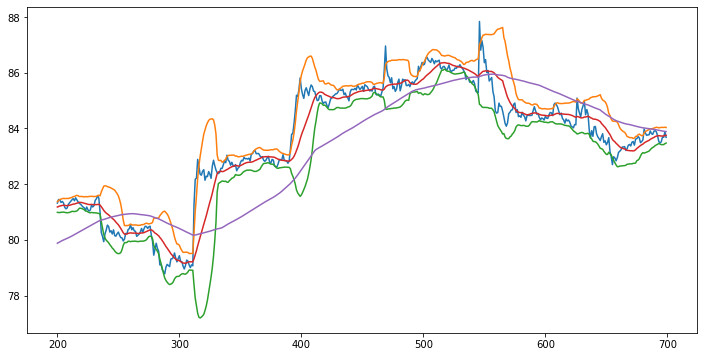

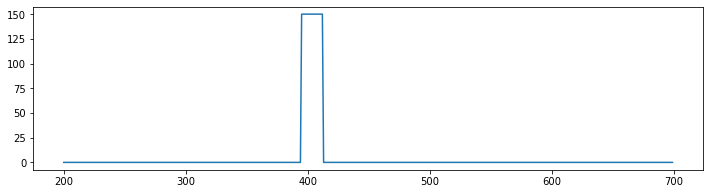

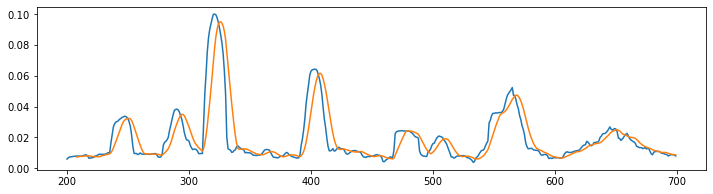

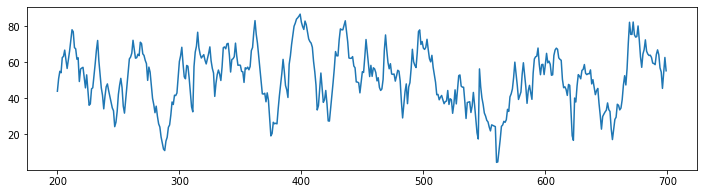

In [4]:
x = 700
r = 500
plt.figure(figsize=(12, 6))
df.Close[x-r:x].plot()
df.high_bollinger[x-r:x].plot()
df.low_bollinger[x-r:x].plot()
df.mid_bollinger[x-r:x].plot()
df.Close.rolling(100).mean()[x-r:x].plot()
plt.show()
plt.figure(figsize=(12, 3))
df['hold'] *= 150
df.hold[x-r:x].plot()
plt.show()
plt.figure(figsize=(12, 3))
df.adj_bollinger_width[x-r:x].plot()
df.bwidth_ma[x-r:x].plot()
plt.show()
plt.figure(figsize=(12, 3))
df.MFI[x-r:x].plot()
plt.show()

In [108]:
type(df.hold)

pandas.core.series.Series

In [95]:
df.to_excel('test123.xlsx')